# 2022 MathorCup 大数据 IssueB 复赛

# 语音业务数据分析

## 导入第三方库

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sp
import warnings
warnings.filterwarnings("ignore")

## 读取经过剔除数据的附件1与附件3

In [2]:
dataOne=pd.read_csv("语音业务Sample.csv",encoding='gbk')
dataThree=pd.read_excel("附件3语音业务用户满意度预测数据.xlsx",sheet_name='语音')

In [3]:
dataOne

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,9,5,5,5,1,0,1,0,0,0,...,0.0,480,1.0,8450801,8450801,1,5,1,2,0
1,1,0,0,0,1,1,1,0,1,0,...,0.0,480,1.0,17425910,17425910,1,5,3,2,0
2,9,6,6,6,1,0,0,0,0,0,...,0.0,413,1.0,6215849,6215849,0,4,1,2,0
3,5,6,6,5,1,1,1,0,0,0,...,0.0,301,1.0,5370710,5370710,1,4,2,2,0
4,4,4,3,2,1,0,1,0,0,1,...,0.0,1193,1.0,3857521,3857521,0,5,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,9,9,9,7,1,0,1,0,0,0,...,0.0,320,0.0,16654303,0,0,3,1,2,5
5309,9,9,9,9,1,1,1,0,0,0,...,0.0,147,0.0,627901,0,1,4,3,2,15
5310,5,4,6,3,1,0,0,0,1,0,...,0.0,150,0.0,6816663,0,0,5,2,2,0
5311,8,8,9,8,1,0,0,0,0,1,...,0.0,82,0.0,1841891,0,0,4,2,2,8


In [4]:
dataThree

,用户id,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,是否不限量套餐到达用户
0,1,2,-1,-1,-1,-1,-1,-1,-1,-1,...,45.37,161,23.6,139,0.000000,14360274,0,否,一星,否
1,2,1,1,2,-1,-1,-1,-1,-1,-1,...,60.00,270,60.0,102,0.000000,9585266,0,否,三星,是
2,3,2,-1,-1,-1,-1,-1,-1,-1,-1,...,89.00,662,89.0,80,0.000000,6545659,0,否,三星,是
3,4,1,1,-1,-1,-1,-1,-1,-1,-1,...,70.00,645,69.1,333,0.000000,8266166,0,否,三星,否
4,5,1,1,-1,-1,-1,-1,-1,-1,-1,...,56.00,496,56.0,258,0.000000,13254086,0,是,三星,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2595,1,-1,-1,-1,-1,-1,-1,7,-1,...,47.00,110,197.0,42,0.000000,34089161,0,否,三星,否
2595,2596,2,-1,-1,-1,-1,-1,-1,-1,-1,...,57.00,238,77.0,157,0.000000,4355664,0,否,三星,否
2596,2597,2,-1,-1,-1,-1,-1,-1,-1,-1,...,8.10,202,8.0,194,0.000000,27678375,0,是,三星,否
2597,2598,1,-1,-1,-1,-1,-1,6,7,-1,...,58.20,148,58.3,66,0.061913,5410723,334996,否,三星,否


## 数据预处理

### 数据标准化

In [5]:
StandardTransform = dataOne[['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                             '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                             '终端品牌','当月ARPU','当月MOU',
                             '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                             '客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']]
StandardTransformScaler = sp.StandardScaler()
StandardTransformScaler = StandardTransformScaler.fit(StandardTransform)
StandardTransform = StandardTransformScaler.transform(StandardTransform)
StandardTransform = pd.DataFrame(StandardTransform)
StandardTransform.columns = ['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                             '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                             '终端品牌','当月ARPU','当月MOU',
                             '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                             '客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']
StandardTransform

,脱网次数,mos质差次数,未接通掉话次数,4\5G用户,套外流量（MB）,套外流量费（元）,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,-0.225327,-0.631270,-0.330596,1.252196,6.982901,15.517067,0.275296,3.843076,1.108216,3.820186,0.275296,-0.099026,0.028818,-0.294692,1.224342,0.901442,-0.082956,0.443649,-0.372476
1,-0.225327,-0.631270,-0.330596,1.252196,-0.095353,-0.145835,0.666114,5.448618,-0.970396,0.384377,0.666114,-0.099026,0.028818,-0.020174,2.697115,0.901442,1.316241,0.443649,-0.372476
2,-0.225327,-0.631270,-0.330596,-0.762008,-0.095353,-0.145835,-0.212468,1.839261,-0.970396,-0.538946,-0.212468,-0.099026,-0.076840,-0.363051,0.857597,-0.153948,-0.082956,0.443649,-0.372476
3,-0.225327,-0.631270,-0.330596,1.252196,-0.095353,-0.145835,-0.489676,0.700447,1.108216,-0.524383,-0.489676,-0.099026,-0.253463,-0.388901,0.718913,-0.153948,0.616642,0.443649,-0.372476
4,-0.225327,-0.631270,-0.330596,-0.762008,-0.095353,-0.145835,0.491912,4.732969,1.108216,0.773221,0.491912,-0.099026,1.153210,-0.435184,0.470606,0.901442,1.316241,1.709548,-0.372476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,-0.225327,0.038259,-0.330596,-0.762008,-0.095353,-0.145835,-0.256397,-0.164554,1.108216,-0.407875,-0.256397,-0.099026,-0.223500,-0.043775,-0.162395,-1.209338,-0.082956,0.443649,-0.231849
5309,-0.196021,0.439976,2.030232,1.252196,-0.095353,-0.145835,1.234162,-0.164554,1.108216,1.381828,1.234162,-0.099026,-0.496319,-0.533967,-0.162395,-0.153948,1.316241,0.443649,0.049406
5310,-0.225327,-0.631270,-0.330596,-0.762008,-0.095353,-0.145835,-0.526031,-0.164554,-0.970396,0.072719,-0.526031,-0.099026,-0.491588,-0.344675,-0.162395,0.901442,0.616642,0.443649,-0.372476
5311,-0.225327,0.439976,-0.330596,-0.762008,-0.095353,-0.145835,-0.429084,-0.164554,-0.403502,-0.961286,-0.429084,-0.099026,-0.598823,-0.496836,-0.162395,-0.153948,0.616642,0.443649,-0.147472


In [6]:
dataOneLeave=dataOne.loc[:,~dataOne.columns.isin(['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                                  '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                                  '终端品牌','当月ARPU','当月MOU',
                                                  '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                                  '客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计'])]

In [7]:
dataOneNewStandard=pd.concat([dataOneLeave, StandardTransform],axis=1)
dataOneNewStandard

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,9,5,5,5,1,0,1,0,0,0,...,3.820186,0.275296,-0.099026,0.028818,-0.294692,1.224342,0.901442,-0.082956,0.443649,-0.372476
1,1,0,0,0,1,1,1,0,1,0,...,0.384377,0.666114,-0.099026,0.028818,-0.020174,2.697115,0.901442,1.316241,0.443649,-0.372476
2,9,6,6,6,1,0,0,0,0,0,...,-0.538946,-0.212468,-0.099026,-0.076840,-0.363051,0.857597,-0.153948,-0.082956,0.443649,-0.372476
3,5,6,6,5,1,1,1,0,0,0,...,-0.524383,-0.489676,-0.099026,-0.253463,-0.388901,0.718913,-0.153948,0.616642,0.443649,-0.372476
4,4,4,3,2,1,0,1,0,0,1,...,0.773221,0.491912,-0.099026,1.153210,-0.435184,0.470606,0.901442,1.316241,1.709548,-0.372476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,9,9,9,7,1,0,1,0,0,0,...,-0.407875,-0.256397,-0.099026,-0.223500,-0.043775,-0.162395,-1.209338,-0.082956,0.443649,-0.231849
5309,9,9,9,9,1,1,1,0,0,0,...,1.381828,1.234162,-0.099026,-0.496319,-0.533967,-0.162395,-0.153948,1.316241,0.443649,0.049406
5310,5,4,6,3,1,0,0,0,1,0,...,0.072719,-0.526031,-0.099026,-0.491588,-0.344675,-0.162395,0.901442,0.616642,0.443649,-0.372476
5311,8,8,9,8,1,0,0,0,0,1,...,-0.961286,-0.429084,-0.099026,-0.598823,-0.496836,-0.162395,-0.153948,0.616642,0.443649,-0.147472


In [8]:
dataOneNewStandard.columns=['语音通话整体满意度','网络覆盖与信号强度','语音通话清晰度','语音通话稳定性',
                            '是否遇到过网络问题','居民小区','办公室','高校',
                            '商业街','地铁','农村','高铁',
                            '其他，请注明','手机没有信号','有信号无法拨通','通话过程中突然中断',
                            '通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1',
                            '是否投诉','是否关怀用户','是否4G网络客户（本地剔除物联网）','外省语音占比',
                            '外省流量占比','是否5G网络客户','脱网次数','mos质差次数',
                            '未接通掉话次数','4\\5G用户','套外流量（MB）','套外流量费（元）',
                            '语音通话-时长（分钟）','省际漫游-时长（分钟）','终端品牌',
                            '当月ARPU','当月MOU','前3月ARPU','前3月MOU',
                            'GPRS总流量（KB）','GPRS-国内漫游-流量（KB）','客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']
dataOneNewStandard

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,9,5,5,5,1,0,1,0,0,0,...,3.820186,0.275296,-0.099026,0.028818,-0.294692,1.224342,0.901442,-0.082956,0.443649,-0.372476
1,1,0,0,0,1,1,1,0,1,0,...,0.384377,0.666114,-0.099026,0.028818,-0.020174,2.697115,0.901442,1.316241,0.443649,-0.372476
2,9,6,6,6,1,0,0,0,0,0,...,-0.538946,-0.212468,-0.099026,-0.076840,-0.363051,0.857597,-0.153948,-0.082956,0.443649,-0.372476
3,5,6,6,5,1,1,1,0,0,0,...,-0.524383,-0.489676,-0.099026,-0.253463,-0.388901,0.718913,-0.153948,0.616642,0.443649,-0.372476
4,4,4,3,2,1,0,1,0,0,1,...,0.773221,0.491912,-0.099026,1.153210,-0.435184,0.470606,0.901442,1.316241,1.709548,-0.372476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,9,9,9,7,1,0,1,0,0,0,...,-0.407875,-0.256397,-0.099026,-0.223500,-0.043775,-0.162395,-1.209338,-0.082956,0.443649,-0.231849
5309,9,9,9,9,1,1,1,0,0,0,...,1.381828,1.234162,-0.099026,-0.496319,-0.533967,-0.162395,-0.153948,1.316241,0.443649,0.049406
5310,5,4,6,3,1,0,0,0,1,0,...,0.072719,-0.526031,-0.099026,-0.491588,-0.344675,-0.162395,0.901442,0.616642,0.443649,-0.372476
5311,8,8,9,8,1,0,0,0,0,1,...,-0.961286,-0.429084,-0.099026,-0.598823,-0.496836,-0.162395,-0.153948,0.616642,0.443649,-0.147472


## 机器学习

### "语音通话整体满意度"学习

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [10]:
XdataOneFirst=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                         '语音通话清晰度','语音通话稳定性'])]
ydataOneFirst=dataOneNewStandard['语音通话整体满意度']
XdataOneFirst_train, XdataOneFirst_test, ydataOneFirst_train, ydataOneFirst_test = train_test_split(XdataOneFirst, ydataOneFirst, test_size=0.2, random_state=2022)

#### 决策树，随机森林

In [11]:
DecisionTreeFirst = DecisionTreeClassifier(random_state=2022)
RandomForestFirst = RandomForestClassifier(random_state=2022)
DecisionTreeFirst = DecisionTreeFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
RandomForestFirst = RandomForestFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
RandomForestFirst_score = RandomForestFirst.score(XdataOneFirst_test, ydataOneFirst_test)
RandomForestFirst_score

0.5785512699905927

#### XGBoost

In [12]:
from xgboost import XGBClassifier

XGBFirst = XGBClassifier(learning_rate=0.01,
                         n_estimators=14,
                         max_depth=5,
                         min_child_weight=1,
                         gamma=0.,
                         subsample=1,
                         colsample_btree=1,
                         scale_pos_weight=1,
                         random_state=2022,
                         slient=0)
XGBFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
XGBFirst_score = XGBFirst.score(XdataOneFirst_test, ydataOneFirst_test)
XGBFirst_score

[22:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.5851364063969896

#### KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

KNNFirst = KNeighborsClassifier()
KNNFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
KNNFirst_score = KNNFirst.score(XdataOneFirst_test, ydataOneFirst_test)
KNNFirst_score

0.5315145813734713

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(2,20)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(2,20)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneFirst_train, ydataOneFirst_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'weights': ['uniform']},
                         {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [15]:
KNN_turing_grid_search.best_score_

0.5927058823529412

In [16]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 18, 'p': 2, 'weights': 'distance'}

In [17]:
KNNFirst_new = KNeighborsClassifier(n_neighbors=25, p=2, weights='distance')
KNNFirst_new.fit(XdataOneFirst_train, ydataOneFirst_train)
KNNFirst_new_score = KNNFirst_new.score(XdataOneFirst_test, ydataOneFirst_test)
KNNFirst_new_score

0.5841956726246472

#### 支持向量机

In [18]:
from sklearn.svm import SVC

SVMFirst = SVC(random_state=2022)
SVMFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
SVMFirst_score = SVMFirst.score(XdataOneFirst_test, ydataOneFirst_test)
SVMFirst_score

0.5898400752587017

#### lightgbm

In [19]:
from lightgbm import LGBMClassifier
LightgbmFirst = LGBMClassifier(learning_rate = 0.1,
                               lambda_l1=0.1,
                               lambda_l2=0.2,
                               max_depth=4,
                               objective='multiclass',
                               num_class=3,
                               random_state=2022)
LightgbmFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
LightgbmFirst_score = LightgbmFirst.score(XdataOneFirst_test, ydataOneFirst_test)
LightgbmFirst_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.5757290686735654

#### 逻辑回归

In [20]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionFirst = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=1000)
LogisticRegressionFirst = LogisticRegressionFirst.fit(XdataOneFirst_train, ydataOneFirst_train)
LogisticRegressionFirst_score = LogisticRegressionFirst.score(XdataOneFirst_test, ydataOneFirst_test)
LogisticRegressionFirst_score

0.587958607714017

In [21]:
print(f'模型一中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中RF均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中KNN均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中SVM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LR均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一中RF平均绝对误差：1.2022577610536218
模型一中RF均方误差：5.81749764816557
模型一中XGBoost平均绝对误差：1.1580432737535278
模型一中XGBoost均方误差：5.391345249294449
模型一中KNN平均绝对误差：1.1777986829727187
模型一中KNN均方误差：5.712135465663217
模型一中SVM平均绝对误差：1.2323612417685794
模型一中SVM均方误差：6.158043273753528
模型一中LightGBM平均绝对误差：1.167450611476952
模型一中LightGBM均方误差：5.302916274694262
模型一中LR平均绝对误差：1.1326434619002823
模型一中LR均方误差：5.234242709313264


#### 集成学习

In [22]:
from mlxtend.classifier import StackingCVClassifier
FirstModel = StackingCVClassifier(classifiers=[LogisticRegressionFirst,XGBFirst,KNNFirst_new,SVMFirst,LightgbmFirst], meta_classifier=RandomForestClassifier(random_state=2022), random_state=2022, cv=5)
FirstModel.fit(XdataOneFirst_train, ydataOneFirst_train)
FirstModel_score = FirstModel.score(XdataOneFirst_test, ydataOneFirst_test)
FirstModel_score

[22:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.5757290686735654

In [23]:
print(f'模型一平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一平均绝对误差：1.1721542803386642
模型一均方误差：5.305738476011289


### "网络覆盖与信号强度"学习

In [24]:
XdataOneSecond=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                          '语音通话清晰度','语音通话稳定性'])]
ydataOneSecond=dataOneNewStandard['网络覆盖与信号强度']
XdataOneSecond_train, XdataOneSecond_test, ydataOneSecond_train, ydataOneSecond_test = train_test_split(XdataOneSecond, ydataOneSecond, test_size=0.2, random_state=2022)

#### 决策树、随机森林

In [25]:
DecisionTreeSecond = DecisionTreeClassifier(random_state=2022)
RandomForestSecond = RandomForestClassifier(random_state=2022)
DecisionTreeSecond = DecisionTreeSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
RandomForestSecond = RandomForestSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
RandomForestSecond_score = RandomForestSecond.score(XdataOneSecond_test, ydataOneSecond_test)
RandomForestSecond_score

0.49576669802445905

In [26]:
RandomForestSecond = RandomForestClassifier(n_estimators=164, random_state=2022, min_samples_leaf=8, max_depth=19)
RandomForestSecond = RandomForestSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
RandomForestSecond_score = RandomForestSecond.score(XdataOneSecond_test, ydataOneSecond_test)
RandomForestSecond_score

0.4929444967074318

#### XGBoost

In [27]:
from xgboost import XGBClassifier

XGBSecond = XGBClassifier(learning_rate=0.02,
                          n_estimators=13,
                          max_depth=8,
                          min_child_weight=1,
                          gamma=0.05,
                          subsample=1,
                          colsample_btree=1,
                          scale_pos_weight=1,
                          random_state=2022,
                          slient=0)
XGBSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
XGBSecond_score = XGBSecond.score(XdataOneSecond_test, ydataOneSecond_test)
XGBSecond_score

[22:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.4967074317968015

#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNNSecond = KNeighborsClassifier()
KNNSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
KNNSecond_score = KNNSecond.score(XdataOneSecond_test, ydataOneSecond_test)
KNNSecond_score

0.44967074317968014

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(40,50)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(40,50)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneSecond_train, ydataOneSecond_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   40.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                          49],
                          'weights': ['uniform']},
                         {'n_neighbors': [40, 41, 42, 43, 44, 45, 46, 47, 48,
                                          49],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [30]:
KNN_turing_grid_search.best_score_

0.5115294117647059

In [31]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 43, 'weights': 'uniform'}

In [32]:
KNNSecond_new = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                     metric='minkowski',
                                     n_jobs=-1,
                                     n_neighbors=43, p=1,
                                     weights='uniform')
KNNSecond_new.fit(XdataOneSecond_train, ydataOneSecond_train)
KNNSecond_new_score = KNNSecond_new.score(XdataOneSecond_test, ydataOneSecond_test)
KNNSecond_new_score

0.5079962370649106

#### 支持向量机

In [33]:
from sklearn.svm import SVC

SVMSecond = SVC(random_state=2022)
SVMSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
SVMSecond_score = SVMSecond.score(XdataOneSecond_test, ydataOneSecond_test)
SVMSecond_score

0.5061147695202258

#### lightgbm

In [34]:
from lightgbm import LGBMClassifier
LightgbmSecond = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=3,
                                objective='multiclass',
                                num_class=3,
                                random_state=2022)
LightgbmSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
LightgbmSecond_score = LightgbmSecond.score(XdataOneSecond_test, ydataOneSecond_test)
LightgbmSecond_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.49482596425211667

#### 逻辑回归

In [35]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionSecond = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionSecond = LogisticRegressionSecond.fit(XdataOneSecond_train, ydataOneSecond_train)
LogisticRegressionSecond_score = LogisticRegressionSecond.score(XdataOneSecond_test, ydataOneSecond_test)
LogisticRegressionSecond_score

0.4967074317968015

In [36]:
print(f'模型二中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中RF均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中KNN均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中SVM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LR均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二中RF平均绝对误差：1.4487300094073376
模型二中RF均方误差：6.669802445907808
模型二中XGBoost平均绝对误差：1.3913452492944496
模型二中XGBoost均方误差：6.010348071495767
模型二中KNN平均绝对误差：1.3772342427093132
模型二中KNN均方误差：6.2897460018814675
模型二中SVM平均绝对误差：1.4308560677328317
模型二中SVM均方误差：6.755409219190969
模型二中LightGBM平均绝对误差：1.3330197554092191
模型二中LightGBM均方误差：5.592662276575729
模型二中LR平均绝对误差：1.4045155221072436
模型二中LR均方误差：6.373471307619943


#### 集成学习

In [37]:
from mlxtend.classifier import StackingCVClassifier
SecondModel = StackingCVClassifier(classifiers=[RandomForestSecond,XGBSecond,KNNSecond_new,SVMSecond,LogisticRegressionSecond], meta_classifier=LGBMClassifier(random_state=2022), random_state=2022, cv=5)
SecondModel.fit(XdataOneSecond_train, ydataOneSecond_train)
SecondModel_score = SecondModel.score(XdataOneSecond_test, ydataOneSecond_test)
SecondModel_score

[22:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.48447789275634995

In [38]:
print(f'模型二平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二平均绝对误差：1.4609595484477893
模型二均方误差：6.587958607714017


### "语音通话清晰度"学习

In [39]:
XdataOneThird=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                         '语音通话清晰度','语音通话稳定性'])]
ydataOneThird=dataOneNewStandard['语音通话清晰度']
XdataOneThird_train, XdataOneThird_test, ydataOneThird_train, ydataOneThird_test = train_test_split(XdataOneThird, ydataOneThird, test_size=0.2, random_state=2022)

#### 决策树、随机森林

In [40]:
DecisionTreeThird = DecisionTreeClassifier(random_state=2022)
RandomForestThird = RandomForestClassifier(random_state=2022)
DecisionTreeThird = DecisionTreeThird.fit(XdataOneThird_train, ydataOneThird_train)
RandomForestThird = RandomForestThird.fit(XdataOneThird_train, ydataOneThird_train)
RandomForestThird_score = RandomForestThird.score(XdataOneThird_test, ydataOneThird_test)
RandomForestThird_score

0.541862652869238

#### XGBoost

In [41]:
from xgboost import XGBClassifier

XGBThird = XGBClassifier(learning_rate=0.02,
                         n_estimators=14,
                         max_depth=8,
                         min_child_weight=1,
                         gamma=0.05,
                         subsample=1,
                         colsample_btree=1,
                         scale_pos_weight=1,
                         random_state=2022,
                         slient=0)
XGBThird.fit(XdataOneThird_train, ydataOneThird_train)
XGBThird_score = XGBThird.score(XdataOneThird_test, ydataOneThird_test)
XGBThird_score

[22:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.528692380056444

#### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

KNNThird = KNeighborsClassifier()
KNNThird.fit(XdataOneThird_train, ydataOneThird_train)
KNNThird_score = KNNThird.score(XdataOneThird_test, ydataOneThird_test)
KNNThird_score

0.504233301975541

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(30,40)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(30,40)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneThird_train, ydataOneThird_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   35.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38,
                                          39],
                          'weights': ['uniform']},
                         {'n_neighbors': [30, 31, 32, 33, 34, 35, 36, 37, 38,
                                          39],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [44]:
KNN_turing_grid_search.best_score_

0.563529411764706

In [45]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 39, 'p': 2, 'weights': 'distance'}

In [46]:
KNNThird_new = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                    metric='minkowski',
                                    n_jobs=-1,
                                    n_neighbors=39, p=2,
                                    weights='uniform')
KNNThird_new.fit(XdataOneThird_train, ydataOneThird_train)
KNNThird_new_score = KNNThird_new.score(XdataOneThird_test, ydataOneThird_test)
KNNThird_new_score

0.5456255879586077

#### 支持向量机

In [47]:
from sklearn.svm import SVC

SVMThird = SVC(random_state=2022)
SVMThird.fit(XdataOneThird_train, ydataOneThird_train)
SVMThird_score = SVMThird.score(XdataOneThird_test, ydataOneThird_test)
SVMThird_score

0.5446848541862653

#### lightgbm

In [48]:
from lightgbm import LGBMClassifier
LightgbmThird = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=9,
                                objective='multiclass',
                                num_class=4,
                                random_state=2022)
LightgbmThird.fit(XdataOneThird_train, ydataOneThird_train)
LightgbmThird_score = LightgbmThird.score(XdataOneThird_test, ydataOneThird_test)
LightgbmThird_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.5399811853245532

#### 逻辑回归

In [49]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionThird = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionThird = LogisticRegressionThird.fit(XdataOneThird_train, ydataOneThird_train)
LogisticRegressionThird_score = LogisticRegressionThird.score(XdataOneThird_test, ydataOneThird_test)
LogisticRegressionThird_score

0.5446848541862653

In [50]:
print(f'模型三中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中RF均方误差：'
      f'{mean_squared_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中KNN均方误差：'
      f'{mean_squared_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中SVM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LR均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三中RF平均绝对误差：1.2238946378174977
模型三中RF均方误差：5.532455315145814
模型三中XGBoost平均绝对误差：1.253057384760113
模型三中XGBoost均方误差：5.399811853245532
模型三中KNN平均绝对误差：1.2041392285983066
模型三中KNN均方误差：5.444967074317968
模型三中SVM平均绝对误差：1.242709313264346
模型三中SVM均方误差：5.7300094073377235
模型三中LightGBM平均绝对误差：1.2031984948259642
模型三中LightGBM均方误差：5.2746942615239885
模型三中LR平均绝对误差：1.175917215428034
模型三中LR均方误差：5.055503292568203


#### 集成学习

In [51]:
from mlxtend.classifier import StackingCVClassifier
ThirdModel = StackingCVClassifier(classifiers=[XGBThird,LightgbmThird,KNNThird_new,SVMThird,LogisticRegressionThird], meta_classifier=RandomForestClassifier(random_state=2022), random_state=2022, cv=5)
ThirdModel.fit(XdataOneThird_train, ydataOneThird_train)
ThirdModel_score = ThirdModel.score(XdataOneThird_test, ydataOneThird_test)
ThirdModel_score

[22:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner

0.5333960489181562

In [52]:
print(f'模型三平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三均方误差：'
      f'{mean_squared_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三平均绝对误差：1.257761053621825
模型三均方误差：5.628410159924742


### "语音通话稳定性"学习

In [53]:
XdataOneFourth=dataOneNewStandard.loc[:,~dataOneNewStandard.columns.isin(['语音通话整体满意度','网络覆盖与信号强度',
                                                                          '语音通话清晰度','语音通话稳定性'])]
ydataOneFourth=dataOneNewStandard['语音通话稳定性']
XdataOneFourth_train, XdataOneFourth_test, ydataOneFourth_train, ydataOneFourth_test = train_test_split(XdataOneFourth, ydataOneFourth, test_size=0.2, random_state=2022)

#### 决策树、随机森林

In [54]:
DecisionTreeFourth = DecisionTreeClassifier(random_state=2022)
RandomForestFourth = RandomForestClassifier(random_state=2022)
DecisionTreeFourth = DecisionTreeFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
RandomForestFourth = RandomForestFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
RandomForestFourth_score = RandomForestFourth.score(XdataOneFourth_test, ydataOneFourth_test)
RandomForestFourth_score

0.510818438381938

#### XGBoost

In [55]:
from xgboost import XGBClassifier

XGBFourth = XGBClassifier(learning_rate=0.02,
                          n_estimators=14,
                          max_depth=6,
                          min_child_weight=1,
                          gamma=0.05,
                          subsample=1,
                          colsample_btree=1,
                          scale_pos_weight=1,
                          random_state=2022,
                          slient=0)
XGBFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
XGBFourth_score = XGBFourth.score(XdataOneFourth_test, ydataOneFourth_test)
XGBFourth_score

[22:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_btree", "scale_pos_weight", "slient" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.5014111006585137

#### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

KNNFourth = KNeighborsClassifier()
KNNFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
KNNFourth_score = KNNFourth.score(XdataOneFourth_test, ydataOneFourth_test)
KNNFourth_score

0.46754468485418627

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_turing_param_grid = [{'weights':['uniform'],
                          'n_neighbors':[k for k in range(35,45)]},
                         {'weights':['distance'],
                          'n_neighbors':[k for k in range(35,45)],
                          'p':[p for p in range(1,5)]}]
KNN_turing = KNeighborsClassifier()
KNN_turing_grid_search = GridSearchCV(KNN_turing,
                                      param_grid = KNN_turing_param_grid,
                                      n_jobs = -1,
                                      verbose = 2)
KNN_turing_grid_search.fit(XdataOneFourth_train, ydataOneFourth_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   37.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [35, 36, 37, 38, 39, 40, 41, 42, 43,
                                          44],
                          'weights': ['uniform']},
                         {'n_neighbors': [35, 36, 37, 38, 39, 40, 41, 42, 43,
                                          44],
                          'p': [1, 2, 3, 4], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [58]:
KNN_turing_grid_search.best_score_

0.5291764705882352

In [59]:
KNN_turing_grid_search.best_params_

{'n_neighbors': 41, 'p': 1, 'weights': 'distance'}

In [60]:
KNNFourth_new = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                     metric='minkowski',
                                     n_jobs=-1,
                                     n_neighbors=41, p=1,
                                     weights='distance')
KNNFourth_new.fit(XdataOneFourth_train, ydataOneFourth_train)
KNNFourth_new_score = KNNFourth_new.score(XdataOneFourth_test, ydataOneFourth_test)
KNNFourth_new_score

0.5183443085606774

#### 支持向量机

In [61]:
from sklearn.svm import SVC

SVMFourth = SVC(random_state=2022)
SVMFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
SVMFourth_score = SVMFourth.score(XdataOneFourth_test, ydataOneFourth_test)
SVMFourth_score

0.5258701787394168

#### lightgbm

In [62]:
from lightgbm import LGBMClassifier
LightgbmFourth = LGBMClassifier(learning_rate = 0.1,
                                lambda_l1=0.1,
                                lambda_l2=0.2,
                                max_depth=10,
                                objective='multiclass',
                                num_class=4,
                                random_state=2022)
LightgbmFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
LightgbmFourth_score = LightgbmFourth.score(XdataOneFourth_test, ydataOneFourth_test)
LightgbmFourth_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2


0.5051740357478833

#### 逻辑回归

In [63]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionFourth = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=2000)
LogisticRegressionFourth = LogisticRegressionFourth.fit(XdataOneFourth_train, ydataOneFourth_train)
LogisticRegressionFourth_score = LogisticRegressionFourth.score(XdataOneFourth_test, ydataOneFourth_test)
LogisticRegressionFourth_score

0.522107243650047

In [64]:
print(f'模型四中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中RF均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中KNN均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中SVM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LR均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四中RF平均绝对误差：1.297271872060207
模型四中RF均方误差：5.705550329256821
模型四中XGBoost平均绝对误差：1.380997177798683
模型四中XGBoost均方误差：6.191909689557855
模型四中KNN平均绝对误差：1.2991533396048918
模型四中KNN均方误差：5.7826904985889
模型四中SVM平均绝对误差：1.3424270931326434
模型四中SVM均方误差：6.157102539981185
模型四中LightGBM平均绝对误差：1.2605832549388523
模型四中LightGBM均方误差：5.301975540921919
模型四中LR平均绝对误差：1.2803386641580432
模型四中LR均方误差：5.58137347130762


#### 集成学习

In [65]:
from mlxtend.classifier import StackingCVClassifier
FourthModel = StackingCVClassifier(classifiers=[RandomForestFourth,LightgbmFourth,KNNFourth_new,LogisticRegressionFourth,SVMFourth], meta_classifier=XGBClassifier(random_state=2022), random_state=2022, cv=5)
FourthModel.fit(XdataOneFourth_train, ydataOneFourth_train)
FourthModel_score = FourthModel.score(XdataOneFourth_test, ydataOneFourth_test)
FourthModel_score

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ign

0.5202257761053621

In [66]:
print(f'模型四平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四平均绝对误差：1.3584195672624648
模型四均方误差：6.180620884289746


## 预测附件3四项评分

In [67]:
dataThree=pd.read_excel("附件3语音业务用户满意度预测数据.xlsx",sheet_name='语音')
dataThree

,用户id,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,是否不限量套餐到达用户
0,1,2,-1,-1,-1,-1,-1,-1,-1,-1,...,45.37,161,23.6,139,0.000000,14360274,0,否,一星,否
1,2,1,1,2,-1,-1,-1,-1,-1,-1,...,60.00,270,60.0,102,0.000000,9585266,0,否,三星,是
2,3,2,-1,-1,-1,-1,-1,-1,-1,-1,...,89.00,662,89.0,80,0.000000,6545659,0,否,三星,是
3,4,1,1,-1,-1,-1,-1,-1,-1,-1,...,70.00,645,69.1,333,0.000000,8266166,0,否,三星,否
4,5,1,1,-1,-1,-1,-1,-1,-1,-1,...,56.00,496,56.0,258,0.000000,13254086,0,是,三星,是
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,2595,1,-1,-1,-1,-1,-1,-1,7,-1,...,47.00,110,197.0,42,0.000000,34089161,0,否,三星,否
2595,2596,2,-1,-1,-1,-1,-1,-1,-1,-1,...,57.00,238,77.0,157,0.000000,4355664,0,否,三星,否
2596,2597,2,-1,-1,-1,-1,-1,-1,-1,-1,...,8.10,202,8.0,194,0.000000,27678375,0,是,三星,否
2597,2598,1,-1,-1,-1,-1,-1,6,7,-1,...,58.20,148,58.3,66,0.061913,5410723,334996,否,三星,否


### 附件格式统一

In [68]:
dataThree.drop(['用户id',
                '用户描述',
                '用户描述.1',
                '性别',
                '终端品牌类型',
                '是否不限量套餐到达用户'], axis=1, inplace=True)

In [69]:
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,45.37,161,23.6,139,0.000000,14360274,0,否,一星
1,1,1,2,-1,-1,-1,-1,-1,-1,-1,...,华为,60.00,270,60.0,102,0.000000,9585266,0,否,三星
2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,89.00,662,89.0,80,0.000000,6545659,0,否,三星
3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,70.00,645,69.1,333,0.000000,8266166,0,否,三星
4,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,56.00,496,56.0,258,0.000000,13254086,0,是,三星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,-1,-1,-1,-1,-1,-1,7,-1,1,...,华为,47.00,110,197.0,42,0.000000,34089161,0,否,三星
2595,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,57.00,238,77.0,157,0.000000,4355664,0,否,三星
2596,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,8.10,202,8.0,194,0.000000,27678375,0,是,三星
2597,1,-1,-1,-1,-1,-1,6,7,-1,-1,...,华为,58.20,148,58.3,66,0.061913,5410723,334996,否,三星


In [70]:
dataThree.isnull().sum()

是否遇到过网络问题            0
居民小区                 0
办公室                  0
高校                   0
商业街                  0
地铁                   0
农村                   0
高铁                   0
其他，请注明               0
手机没有信号               0
有信号无法拨通              0
通话过程中突然中断            0
通话中有杂音、听不清、断断续续      0
串线                   0
通话过程中一方听不见           0
其他，请注明.1             0
脱网次数                 0
mos质差次数              0
未接通掉话次数              0
是否投诉                 0
4\5G用户               0
是否关怀用户               0
套外流量（MB）             0
是否4G网络客户（本地剔除物联网）    0
套外流量费（元）             0
外省语音占比               0
语音通话-时长（分钟）          0
省际漫游-时长（分钟）          0
终端品牌                 0
当月ARPU               0
当月MOU                0
前3月ARPU              0
前3月MOU               0
外省流量占比               0
GPRS总流量（KB）          0
GPRS-国内漫游-流量（KB）     0
是否5G网络客户             0
客户星级标识               0
dtype: int64

In [71]:
dataThree["外省流量占比"] = dataThree["外省流量占比"].astype(str).replace('%','')
dataThree["外省语音占比"] = dataThree["外省语音占比"].astype(str).replace('%','')
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,45.37,161,23.6,139,0.0,14360274,0,否,一星
1,1,1,2,-1,-1,-1,-1,-1,-1,-1,...,华为,60.00,270,60.0,102,0.0,9585266,0,否,三星
2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,89.00,662,89.0,80,0.0,6545659,0,否,三星
3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,70.00,645,69.1,333,0.0,8266166,0,否,三星
4,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,华为,56.00,496,56.0,258,0.0,13254086,0,是,三星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,-1,-1,-1,-1,-1,-1,7,-1,1,...,华为,47.00,110,197.0,42,0.0,34089161,0,否,三星
2595,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,57.00,238,77.0,157,0.0,4355664,0,否,三星
2596,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,苹果,8.10,202,8.0,194,0.0,27678375,0,是,三星
2597,1,-1,-1,-1,-1,-1,6,7,-1,-1,...,华为,58.20,148,58.3,66,0.0619133524299802,5410723,334996,否,三星


In [72]:
dataThree.replace({"是否遇到过网络问题":{2:0},
                   "居民小区":{-1:0},
                   "办公室":{-1:0,2:1},
                   "高校":{-1:0,3:1},
                   "商业街":{-1:0,4:1},
                   "地铁":{-1:0,5:1},
                   "农村":{-1:0,6:1},
                   "高铁":{-1:0,7:1},
                   "其他，请注明":{-1:0,98:1},
                   "手机没有信号":{-1:0},
                   "有信号无法拨通":{-1:0,2:1},
                   "通话过程中突然中断":{-1:0,3:1},
                   "通话中有杂音、听不清、断断续续":{-1:0,4:1},
                   "串线":{-1:0,5:1},
                   "通话过程中一方听不见":{-1:0,6:1},
                   "其他，请注明.1":{-1:0,98:1},
                   "是否投诉":{'是':1,'否':0},
                   "是否关怀用户":{'是':1,'否':0},
                   "是否4G网络客户（本地剔除物联网）":{'是':1,"否":0},
                   "是否5G网络客户":{'是':1,"否":0},
                   "客户星级标识":{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8},
                   "终端品牌":{'苹果':22,'华为':11,'小米科技':14,
                            '步步高':18,'欧珀':17,'三星':4,
                            'realme':1,'0':0,'万普拉斯':3,
                            '锤子':24,'万普':8,'中邮通信':21,
                            '索尼爱立信':6,'亿城':6,'宇龙':6,
                            '中国移动':7,'中兴':10,'黑鲨':25,
                            '海信':16,'摩托罗拉':9,'诺基亚':12,
                            '奇酷':13}
                   }, inplace=True)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.0,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.0,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.0,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.0,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.0,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.0,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.0,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.0,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.0619133524299802,5410723,334996,0,4


In [73]:
dataThree['外省语音占比'] = dataThree['外省语音占比'].astype('float64')
dataThree['外省流量占比'] = dataThree['外省流量占比'].astype('float64')
dataThree['是否4G网络客户（本地剔除物联网）'] = dataThree['是否4G网络客户（本地剔除物联网）'].astype('int64')
dataThree['4\\5G用户'] = dataThree['4\\5G用户'].astype(str)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.000000,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.000000,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.000000,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.000000,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.000000,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.000000,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.000000,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.000000,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.061913,5410723,334996,0,4


In [74]:
le=sp.LabelEncoder()

FourFiveUser=le.fit_transform(dataThree["4\\5G用户"])
dataThree["4\\5G用户"]=pd.DataFrame(FourFiveUser)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.000000,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.000000,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.000000,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.000000,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.000000,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.000000,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.000000,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.000000,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.061913,5410723,334996,0,4


In [75]:
dataThree['是否5G网络客户'] = dataThree['是否5G网络客户'].astype('int64')
dataThree['客户星级标识'] = dataThree['客户星级标识'].astype('int64')
dataThree['终端品牌'] = dataThree['终端品牌'].astype('int32')
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识
0,0,0,0,0,0,0,0,0,0,0,...,11,45.37,161,23.6,139,0.000000,14360274,0,0,2
1,1,1,1,0,0,0,0,0,0,0,...,11,60.00,270,60.0,102,0.000000,9585266,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,22,89.00,662,89.0,80,0.000000,6545659,0,0,4
3,1,1,0,0,0,0,0,0,0,0,...,22,70.00,645,69.1,333,0.000000,8266166,0,0,4
4,1,1,0,0,0,0,0,0,0,0,...,11,56.00,496,56.0,258,0.000000,13254086,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,11,47.00,110,197.0,42,0.000000,34089161,0,0,4
2595,0,0,0,0,0,0,0,0,0,0,...,22,57.00,238,77.0,157,0.000000,4355664,0,0,4
2596,0,0,0,0,0,0,0,0,0,0,...,22,8.10,202,8.0,194,0.000000,27678375,0,1,4
2597,1,0,0,0,0,0,1,1,0,0,...,11,58.20,148,58.3,66,0.061913,5410723,334996,0,4


In [76]:
dataThree['场所合计']=dataThree.loc[:,['居民小区','办公室', '高校', '商业街', '地铁', '农村', '高铁', '其他，请注明']].apply(lambda x1:x1.sum(),axis=1)
dataThree['出现问题合计']=dataThree.loc[:,['手机没有信号','有信号无法拨通','通话过程中突然中断','通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1']].apply(lambda x1:x1.sum(),axis=1)
dataThree['脱网次数、mos质差次数、未接通掉话次数合计']=dataThree.loc[:,['脱网次数','mos质差次数','未接通掉话次数']].apply(lambda x1:x1.sum(),axis=1)
dataThree

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,0,0,0,0,0,0,0,0,0,0,...,23.6,139,0.000000,14360274,0,0,2,0,0,1
1,1,1,1,0,0,0,0,0,0,0,...,60.0,102,0.000000,9585266,0,0,4,2,1,18
2,0,0,0,0,0,0,0,0,0,0,...,89.0,80,0.000000,6545659,0,0,4,0,0,56
3,1,1,0,0,0,0,0,0,0,0,...,69.1,333,0.000000,8266166,0,0,4,1,1,23
4,1,1,0,0,0,0,0,0,0,0,...,56.0,258,0.000000,13254086,0,1,4,1,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,197.0,42,0.000000,34089161,0,0,4,1,1,110
2595,0,0,0,0,0,0,0,0,0,0,...,77.0,157,0.000000,4355664,0,0,4,0,0,27
2596,0,0,0,0,0,0,0,0,0,0,...,8.0,194,0.000000,27678375,0,1,4,0,0,5
2597,1,0,0,0,0,0,1,1,0,0,...,58.3,66,0.061913,5410723,334996,0,4,2,1,14


In [77]:
dataThreeStandardTransform = dataThree[['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                        '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                        '终端品牌','当月ARPU','当月MOU',
                                        '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                        '客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']]
dataThreeStandardTransformScaler = sp.StandardScaler()
dataThreeStandardTransformScaler = dataThreeStandardTransformScaler.fit(dataThreeStandardTransform)
dataThreeStandardTransform = dataThreeStandardTransformScaler.transform(dataThreeStandardTransform)
dataThreeStandardTransform = pd.DataFrame(dataThreeStandardTransform)
dataThreeStandardTransform.columns = ['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                      '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                      '终端品牌','当月ARPU','当月MOU',
                                      '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                      '客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']
dataThreeStandardTransform

,脱网次数,mos质差次数,未接通掉话次数,4\5G用户,套外流量（MB）,套外流量费（元）,语音通话-时长（分钟）,省际漫游-时长（分钟）,终端品牌,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,-0.509660,-0.716592,-0.373578,-0.743848,-0.076033,0.026766,-0.603708,-0.131605,-0.901439,-0.592705,-0.603708,-0.885519,-0.586506,-0.257333,-0.118890,-2.261622,-0.772280,-0.823790,-0.807210
1,-0.543100,0.134058,-0.211676,-0.743848,-0.092908,-0.142870,-0.393645,-0.131605,-0.901439,-0.386275,-0.393645,-0.351281,-0.677327,-0.473804,-0.118890,-0.177241,0.625948,-0.176758,-0.376624
2,-0.108386,1.234899,0.274032,-0.743848,-0.092908,-0.142870,0.361809,-0.131605,1.192082,0.022917,0.361809,0.074349,-0.731329,-0.611602,-0.118890,-0.177241,-0.772280,-0.823790,0.585860
3,-0.275583,-0.066095,-0.049773,-0.743848,-0.092908,-0.142870,0.329047,-0.131605,1.192082,-0.245174,0.329047,-0.217721,-0.110311,-0.533604,-0.118890,-0.177241,-0.073166,-0.176758,-0.249982
4,0.192570,-0.666554,-0.049773,1.284758,-0.092908,-0.142870,0.041897,-0.131605,-0.901439,-0.442715,0.041897,-0.409988,-0.294407,-0.307481,-0.118890,-0.177241,-0.073166,1.117307,-0.199325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,3.101810,-0.666554,-0.373578,-0.743848,-0.092908,-0.142870,-0.701994,-0.131605,-0.901439,-0.569706,-0.701994,1.659451,-0.824604,0.637059,-0.118890,-0.177241,-0.073166,-0.176758,1.953601
2595,-0.008067,-0.266248,-0.049773,-0.743848,-0.092908,-0.142870,-0.455315,-0.131605,1.192082,-0.428605,-0.455315,-0.101774,-0.542323,-0.710884,-0.118890,-0.177241,-0.772280,-0.823790,-0.148668
2596,-0.442781,-0.616516,-0.373578,1.284758,-0.092908,-0.142870,-0.524693,-0.131605,1.192082,-1.118588,-0.524693,-1.114478,-0.451503,0.346431,-0.118890,-0.177241,-0.772280,-0.823790,-0.705895
2597,-0.208704,-0.566477,-0.211676,-0.743848,-0.092908,-0.142870,-0.628761,-0.131605,-0.901439,-0.411673,-0.628761,-0.376231,-0.765693,-0.663054,0.208773,-0.177241,0.625948,-0.176758,-0.477939


In [78]:
dataThreeLeave=dataThree.loc[:,~dataThree.columns.isin(['脱网次数','mos质差次数','未接通掉话次数','4\\5G用户',
                                                        '套外流量（MB）','套外流量费（元）','语音通话-时长（分钟）','省际漫游-时长（分钟）',
                                                        '终端品牌','当月ARPU','当月MOU',
                                                        '前3月ARPU','前3月MOU','GPRS总流量（KB）','GPRS-国内漫游-流量（KB）',
                                                        '客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计'])]
dataThreeNewStandard=pd.concat([dataThreeLeave, dataThreeStandardTransform],axis=1)
dataThreeNewStandard.columns=['是否遇到过网络问题','居民小区','办公室','高校',
                              '商业街','地铁','农村','高铁',
                              '其他，请注明','手机没有信号','有信号无法拨通','通话过程中突然中断',
                              '通话中有杂音、听不清、断断续续','串线','通话过程中一方听不见','其他，请注明.1',
                              '是否投诉','是否关怀用户','是否4G网络客户（本地剔除物联网）','外省语音占比',
                              '外省流量占比','是否5G网络客户','脱网次数','mos质差次数',
                              '未接通掉话次数','4\\5G用户','套外流量（MB）','套外流量费（元）',
                              '语音通话-时长（分钟）','省际漫游-时长（分钟）','终端品牌',
                              '当月ARPU','当月MOU','前3月ARPU','前3月MOU',
                              'GPRS总流量（KB）','GPRS-国内漫游-流量（KB）','客户星级标识','场所合计','出现问题合计','脱网次数、mos质差次数、未接通掉话次数合计']
dataThreeNewStandard

,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,手机没有信号,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,0,0,0,0,0,0,0,0,0,0,...,-0.592705,-0.603708,-0.885519,-0.586506,-0.257333,-0.118890,-2.261622,-0.772280,-0.823790,-0.807210
1,1,1,1,0,0,0,0,0,0,0,...,-0.386275,-0.393645,-0.351281,-0.677327,-0.473804,-0.118890,-0.177241,0.625948,-0.176758,-0.376624
2,0,0,0,0,0,0,0,0,0,0,...,0.022917,0.361809,0.074349,-0.731329,-0.611602,-0.118890,-0.177241,-0.772280,-0.823790,0.585860
3,1,1,0,0,0,0,0,0,0,0,...,-0.245174,0.329047,-0.217721,-0.110311,-0.533604,-0.118890,-0.177241,-0.073166,-0.176758,-0.249982
4,1,1,0,0,0,0,0,0,0,0,...,-0.442715,0.041897,-0.409988,-0.294407,-0.307481,-0.118890,-0.177241,-0.073166,1.117307,-0.199325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1,0,0,0,0,0,0,1,0,1,...,-0.569706,-0.701994,1.659451,-0.824604,0.637059,-0.118890,-0.177241,-0.073166,-0.176758,1.953601
2595,0,0,0,0,0,0,0,0,0,0,...,-0.428605,-0.455315,-0.101774,-0.542323,-0.710884,-0.118890,-0.177241,-0.772280,-0.823790,-0.148668
2596,0,0,0,0,0,0,0,0,0,0,...,-1.118588,-0.524693,-1.114478,-0.451503,0.346431,-0.118890,-0.177241,-0.772280,-0.823790,-0.705895
2597,1,0,0,0,0,0,1,1,0,0,...,-0.411673,-0.628761,-0.376231,-0.765693,-0.663054,0.208773,-0.177241,0.625948,-0.176758,-0.477939


In [79]:
dataOneNewStandard

,语音通话整体满意度,网络覆盖与信号强度,语音通话清晰度,语音通话稳定性,是否遇到过网络问题,居民小区,办公室,高校,商业街,地铁,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,客户星级标识,场所合计,出现问题合计,脱网次数、mos质差次数、未接通掉话次数合计
0,9,5,5,5,1,0,1,0,0,0,...,3.820186,0.275296,-0.099026,0.028818,-0.294692,1.224342,0.901442,-0.082956,0.443649,-0.372476
1,1,0,0,0,1,1,1,0,1,0,...,0.384377,0.666114,-0.099026,0.028818,-0.020174,2.697115,0.901442,1.316241,0.443649,-0.372476
2,9,6,6,6,1,0,0,0,0,0,...,-0.538946,-0.212468,-0.099026,-0.076840,-0.363051,0.857597,-0.153948,-0.082956,0.443649,-0.372476
3,5,6,6,5,1,1,1,0,0,0,...,-0.524383,-0.489676,-0.099026,-0.253463,-0.388901,0.718913,-0.153948,0.616642,0.443649,-0.372476
4,4,4,3,2,1,0,1,0,0,1,...,0.773221,0.491912,-0.099026,1.153210,-0.435184,0.470606,0.901442,1.316241,1.709548,-0.372476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,9,9,9,7,1,0,1,0,0,0,...,-0.407875,-0.256397,-0.099026,-0.223500,-0.043775,-0.162395,-1.209338,-0.082956,0.443649,-0.231849
5309,9,9,9,9,1,1,1,0,0,0,...,1.381828,1.234162,-0.099026,-0.496319,-0.533967,-0.162395,-0.153948,1.316241,0.443649,0.049406
5310,5,4,6,3,1,0,0,0,1,0,...,0.072719,-0.526031,-0.099026,-0.491588,-0.344675,-0.162395,0.901442,0.616642,0.443649,-0.372476
5311,8,8,9,8,1,0,0,0,0,1,...,-0.961286,-0.429084,-0.099026,-0.598823,-0.496836,-0.162395,-0.153948,0.616642,0.443649,-0.147472


### 预测语音业务评分
需要注意到在所有预测结果上加上1，由于之前将评分编码为[0,9]，这里需要再映射回[1,10]

In [80]:
Xpre=dataThreeNewStandard

#### 语音通话整体满意度

In [81]:
FirstPre=FirstModel.predict(Xpre)
FirstPre

array([9, 8, 9, ..., 9, 9, 9], dtype=int64)

#### 网络覆盖与信号强度

In [82]:
SecondPre=SecondModel.predict(Xpre)
SecondPre

array([9, 8, 9, ..., 9, 9, 9], dtype=int64)

#### 语音通话清晰度

In [83]:
ThirdPre=ThirdModel.predict(Xpre)
ThirdPre

array([9, 8, 9, ..., 9, 9, 9], dtype=int64)

#### 语音通话稳定性

In [84]:
FourthPre=FourthModel.predict(Xpre)
FourthPre

array([9, 9, 9, ..., 9, 9, 9], dtype=int64)

## 模型效果分析

In [85]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 混淆矩阵热力图

#### 模型一

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

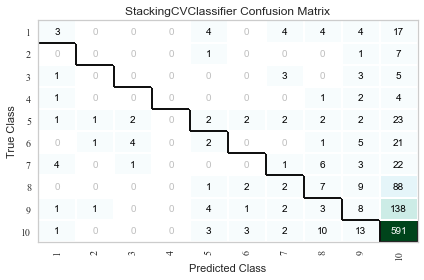

In [86]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(FirstModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneFirst_train, ydataOneFirst_train)
confusion_matrix.score(XdataOneFirst_test, ydataOneFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型一混淆矩阵热力图.pdf')

#### 模型二

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

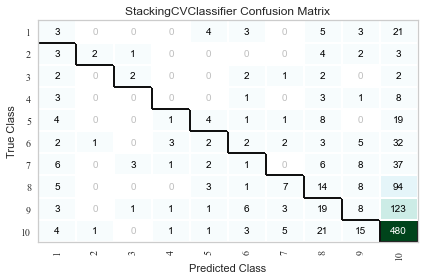

In [87]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(SecondModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneSecond_train, ydataOneSecond_train)
confusion_matrix.score(XdataOneSecond_test, ydataOneSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型二混淆矩阵热力图.pdf')

#### 模型三

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

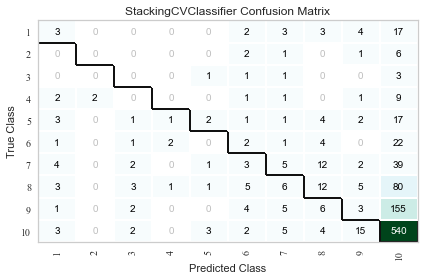

In [88]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(ThirdModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneThird_train, ydataOneThird_train)
confusion_matrix.score(XdataOneThird_test, ydataOneThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型三混淆矩阵热力图.pdf')

#### 模型四

<AxesSubplot:title={'center':'StackingCVClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

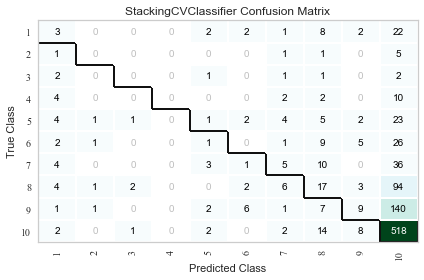

In [89]:
from yellowbrick.classifier import ConfusionMatrix
classes=['1','2','3','4','5','6','7','8','9','10']
confusion_matrix = ConfusionMatrix(FourthModel, classes=classes, cmap='BuGn')
confusion_matrix.fit(XdataOneFourth_train, ydataOneFourth_train)
confusion_matrix.score(XdataOneFourth_test, ydataOneFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
confusion_matrix.show(outpath='figuresOne\\[附件1]模型四混淆矩阵热力图.pdf')

### 分类报告

#### 模型一

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

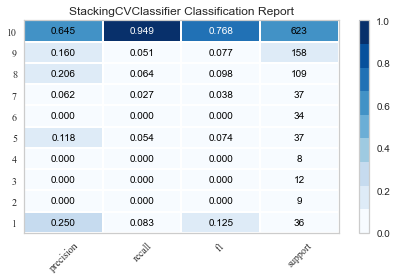

In [90]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(FirstModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneFirst_train, ydataOneFirst_train)
visualizer.score(XdataOneFirst_test, ydataOneFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型一分类报告.pdf')

#### 模型二

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

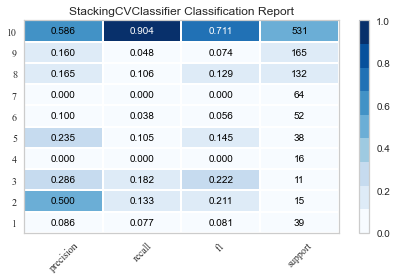

In [91]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(SecondModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneSecond_train, ydataOneSecond_train)
visualizer.score(XdataOneSecond_test, ydataOneSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型二分类报告.pdf')

#### 模型三

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

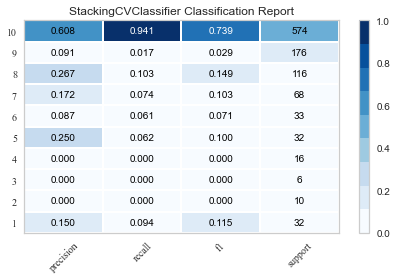

In [92]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(ThirdModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneThird_train, ydataOneThird_train)
visualizer.score(XdataOneThird_test, ydataOneThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型三分类报告.pdf')

#### 模型四

<AxesSubplot:title={'center':'StackingCVClassifier Classification Report'}>

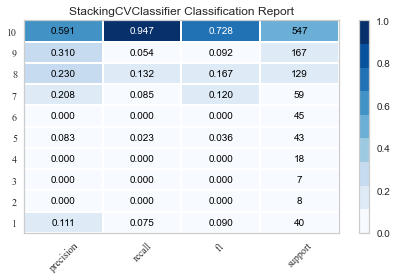

In [93]:
from yellowbrick.classifier import ClassificationReport
classes=['1','2','3','4','5','6','7','8','9','10']
visualizer = ClassificationReport(FourthModel, classes=classes, support=True, cmap='Blues')
visualizer.fit(XdataOneFourth_train, ydataOneFourth_train)
visualizer.score(XdataOneFourth_test, ydataOneFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型四分类报告.pdf')

### ROC AUC曲线

#### 模型一

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

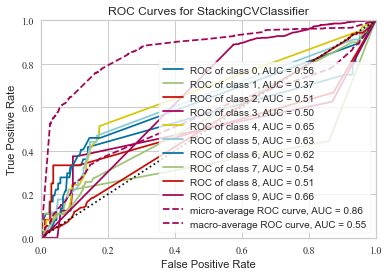

In [94]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(FirstModel)
visualizer.fit(XdataOneFirst_train, ydataOneFirst_train)
visualizer.score(XdataOneFirst_test, ydataOneFirst_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型一ROCAUC.pdf')

#### 模型二

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

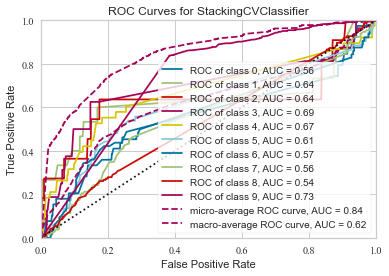

In [95]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(SecondModel)
visualizer.fit(XdataOneSecond_train, ydataOneSecond_train)
visualizer.score(XdataOneSecond_test, ydataOneSecond_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型二ROCAUC.pdf')

#### 模型三

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

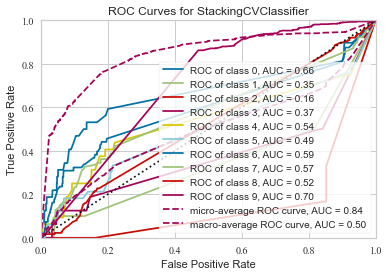

In [96]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(ThirdModel)
visualizer.fit(XdataOneThird_train, ydataOneThird_train)
visualizer.score(XdataOneThird_test, ydataOneThird_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型三ROCAUC.pdf')

#### 模型四

<AxesSubplot:title={'center':'ROC Curves for StackingCVClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

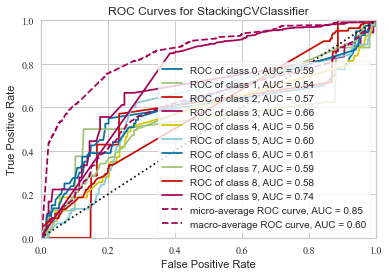

In [97]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(FourthModel)
visualizer.fit(XdataOneFourth_train, ydataOneFourth_train)
visualizer.score(XdataOneFourth_test, ydataOneFourth_test)
plt.xticks(font='Times New Roman')
plt.yticks(font='Times New Roman')
visualizer.show(outpath='figuresOne\\[附件1]模型四ROCAUC.pdf')

### 平均绝对误差，均方误差

#### 模型一

In [98]:
print(f'模型一平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, FirstModel.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中RF均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, RandomForestFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, XGBFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中KNN均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, KNNFirst_new.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中SVM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, SVMFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LightgbmFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型一中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型一中LR均方误差：'
      f'{mean_squared_error(ydataOneFirst_test, LogisticRegressionFirst.predict(XdataOneFirst_test), sample_weight=None, multioutput="uniform_average")}')

模型一平均绝对误差：1.1721542803386642
模型一均方误差：5.305738476011289
模型一中RF平均绝对误差：1.2022577610536218
模型一中RF均方误差：5.81749764816557
模型一中XGBoost平均绝对误差：1.1580432737535278
模型一中XGBoost均方误差：5.391345249294449
模型一中KNN平均绝对误差：1.1777986829727187
模型一中KNN均方误差：5.712135465663217
模型一中SVM平均绝对误差：1.2323612417685794
模型一中SVM均方误差：6.158043273753528
模型一中LightGBM平均绝对误差：1.167450611476952
模型一中LightGBM均方误差：5.302916274694262
模型一中LR平均绝对误差：1.1326434619002823
模型一中LR均方误差：5.234242709313264


#### 模型二

In [99]:
print(f'模型二平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SecondModel.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中RF均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, RandomForestSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, XGBSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中KNN均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, KNNSecond_new.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中SVM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, SVMSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LightgbmSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型二中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型二中LR均方误差：'
      f'{mean_squared_error(ydataOneSecond_test, LogisticRegressionSecond.predict(XdataOneSecond_test), sample_weight=None, multioutput="uniform_average")}')

模型二平均绝对误差：1.4609595484477893
模型二均方误差：6.587958607714017
模型二中RF平均绝对误差：1.4487300094073376
模型二中RF均方误差：6.669802445907808
模型二中XGBoost平均绝对误差：1.3913452492944496
模型二中XGBoost均方误差：6.010348071495767
模型二中KNN平均绝对误差：1.3772342427093132
模型二中KNN均方误差：6.2897460018814675
模型二中SVM平均绝对误差：1.4308560677328317
模型二中SVM均方误差：6.755409219190969
模型二中LightGBM平均绝对误差：1.3330197554092191
模型二中LightGBM均方误差：5.592662276575729
模型二中LR平均绝对误差：1.4045155221072436
模型二中LR均方误差：6.373471307619943


#### 模型三

In [100]:
print(f'模型三平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三均方误差：'
      f'{mean_squared_error(ydataOneThird_test, ThirdModel.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中RF均方误差：'
      f'{mean_squared_error(ydataOneThird_test, RandomForestThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneThird_test, XGBThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中KNN均方误差：'
      f'{mean_squared_error(ydataOneThird_test, KNNThird_new.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中SVM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, SVMThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LightgbmThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型三中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型三中LR均方误差：'
      f'{mean_squared_error(ydataOneThird_test, LogisticRegressionThird.predict(XdataOneThird_test), sample_weight=None, multioutput="uniform_average")}')

模型三平均绝对误差：1.257761053621825
模型三均方误差：5.628410159924742
模型三中RF平均绝对误差：1.2238946378174977
模型三中RF均方误差：5.532455315145814
模型三中XGBoost平均绝对误差：1.253057384760113
模型三中XGBoost均方误差：5.399811853245532
模型三中KNN平均绝对误差：1.2041392285983066
模型三中KNN均方误差：5.444967074317968
模型三中SVM平均绝对误差：1.242709313264346
模型三中SVM均方误差：5.7300094073377235
模型三中LightGBM平均绝对误差：1.2031984948259642
模型三中LightGBM均方误差：5.2746942615239885
模型三中LR平均绝对误差：1.175917215428034
模型三中LR均方误差：5.055503292568203


#### 模型四

In [101]:
print(f'模型四平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, FourthModel.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中RF平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中RF均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, RandomForestFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中XGBoost平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中XGBoost均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, XGBFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中KNN平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中KNN均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, KNNFourth_new.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中SVM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中SVM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, SVMFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LightGBM平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LightGBM均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LightgbmFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')
print(f'模型四中LR平均绝对误差：'
      f'{mean_absolute_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}\n'
      f'模型四中LR均方误差：'
      f'{mean_squared_error(ydataOneFourth_test, LogisticRegressionFourth.predict(XdataOneFourth_test), sample_weight=None, multioutput="uniform_average")}')

模型四平均绝对误差：1.3584195672624648
模型四均方误差：6.180620884289746
模型四中RF平均绝对误差：1.297271872060207
模型四中RF均方误差：5.705550329256821
模型四中XGBoost平均绝对误差：1.380997177798683
模型四中XGBoost均方误差：6.191909689557855
模型四中KNN平均绝对误差：1.2991533396048918
模型四中KNN均方误差：5.7826904985889
模型四中SVM平均绝对误差：1.3424270931326434
模型四中SVM均方误差：6.157102539981185
模型四中LightGBM平均绝对误差：1.2605832549388523
模型四中LightGBM均方误差：5.301975540921919
模型四中LR平均绝对误差：1.2803386641580432
模型四中LR均方误差：5.58137347130762


## 高频词汇云图

In [102]:
import jieba
import wordcloud
from matplotlib.image import imread

jieba.setLogLevel(jieba.logging.INFO)
report = open('语音业务词云.txt', 'r', encoding='utf-8').read()
words = jieba.lcut(report)
txt = []
for word in words:
    if len(word) == 1:
        continue
    else:
        txt.append(word)
a = ' '.join(txt)
bg = imread("bg.jpg")
w = wordcloud.WordCloud(background_color="white", font_path="msyh.ttc", mask=bg)
w.generate(a)
w.to_file("figuresOne\\wordcloudF.png")